In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df_users_data = pd.read_csv('users.tsv', sep='\t')
df_users_data.head(10)

,user_id,sex,age,city_id
0,0,2,19,0
1,1,1,0,1
2,2,2,24,2
3,3,1,20,3
4,4,2,29,4
5,5,2,22,5
6,6,1,21,6
7,7,2,18,0
8,8,2,28,3
9,9,1,15,7


In [3]:
age_0_ratio = (df_users_data['age'] == 0).sum() / len(df_users_data)
print(age_0_ratio)

0.07850480751917606


array([[<Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'city_id'}>]], dtype=object)

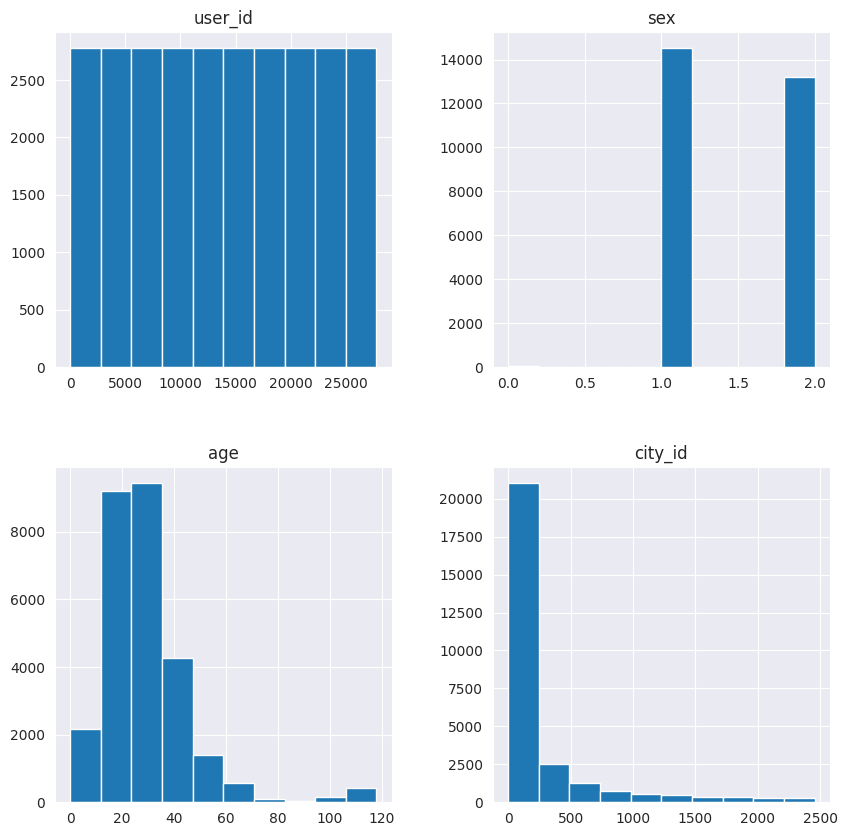

In [4]:
df_users_data.hist(figsize=(10, 10))

In [5]:
df_history_data = pd.read_csv('history.tsv', sep='\t')
df_history_data.head(10)

,hour,cpm,publisher,user_id
0,10,30.00,1,15661
1,8,41.26,1,8444
2,7,360.00,1,15821
3,18,370.00,1,21530
4,8,195.00,2,22148
5,5,70.00,2,16334
6,10,73.22,1,25931
7,6,60.00,1,26199
8,21,125.46,1,9603
9,22,165.00,2,4624


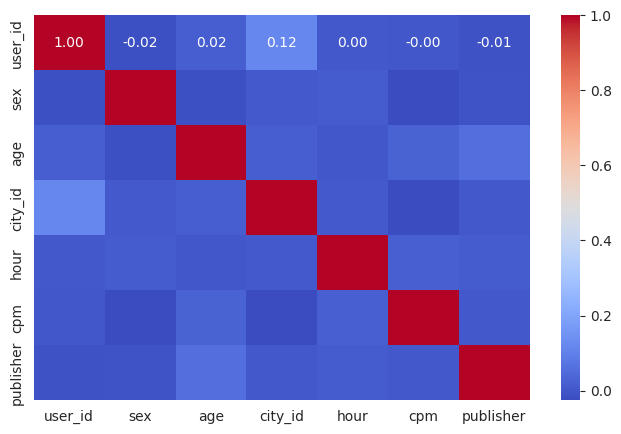

In [6]:
users_copy = df_users_data.copy()
history_copy = df_history_data.copy()

result = pd.merge(df_users_data, df_history_data, on='user_id', how='inner')

plt.figure(figsize=(8, 5))
sns.heatmap(result.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [7]:
df_validate_data = pd.read_csv('validate.tsv', sep='\t')
df_validate_data.head(10) # добавить перцетиль мужчин + попробовать интерпретировать списки

cpm  hour_start  hour_end      publishers  audience_size  \
0  220.0        1058      1153            7,17           1906   
1  312.0        1295      1301            3,18           1380   
2   70.0        1229      1249   1,2,3,9,15,21            888   
3  240.0        1295      1377            1,14            440   
4  262.0         752       990         1,3,7,8           1476   
5  141.0        1288      1322       3,8,11,15            856   
6  250.0        1198      1451  1,3,7,10,13,18            336   
7  280.0        1029      1070           1,2,7            616   
8  270.0         978       994            2,11            484   
9  250.0        1440      1442             2,3            972   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [8]:
df_validate_data.shape

(1008, 6)

### Метрика оценки задачи

In [9]:
df_validate_answers_data = pd.read_csv('validate_answers.tsv', sep='\t')
df_validate_answers_data.head(10)

,at_least_one,at_least_two,at_least_three
0,0.0430,0.0152,0.0073
1,0.0130,0.0000,0.0000
2,0.0878,0.0135,0.0000
3,0.2295,0.1295,0.0727
4,0.3963,0.2785,0.2270
5,0.0187,0.0035,0.0012
6,0.3839,0.2917,0.2202
7,0.3198,0.1396,0.0552
8,0.0062,0.0000,0.0000
9,0.0082,0.0000,0.0000


In [10]:
df_validate_answers_data.shape

(1008, 3)

## TASK LIST

1. Нормализуем данные и склеиваем всё в одну таблицу
2. Проанализировать выбросы и на новой таблице построить ```heatmap```
3. OHE по ```publishers``` и encoding времени (каким-нибудь, возможно с шагом 10)
4. 